[colaboratoryで開く  ](https://colab.research.google.com/github/tenajima/hello_machine_learning/blob/master/hello_mnist.ipynb)

------------

In [ ]:
from sklearn.model_selection import train_test_split
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from PIL import Image

# データのインポート

In [ ]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()

データの形はこんな感じ.

In [ ]:
train_x[0]

よくわからないのでライブラリを使って画像にしてみる

In [ ]:
Image.fromarray(train_x[0])

答えも確認する

In [ ]:
train_y[0]

# 前処理

In [ ]:
# classの数,0~9なので10
num_classes = 10

## 入力データの前処理

In [ ]:
train_x.shape

In [ ]:
test_x.shape

bostonのときと同じように(データ数) $\times$ (特徴量)の形にする.

In [ ]:
train_x = train_x.reshape(train_x.shape[0], train_x.shape[1] * train_x.shape[2])
test_x = test_x.reshape(test_x.shape[0], test_x.shape[1] * test_x.shape[2])

In [ ]:
train_x.shape

In [ ]:
# データ型の変換
train_x = train_x.astype('float32')
test_x = test_x.astype('float32')

In [ ]:
# 数値を0~1の範囲に変換
train_x /= 255
test_x /= 255

In [ ]:
train_x[0]

## 出力データの前処理

出力データは入力データの1行に対して,0の確率は何%で1の確率は何%で...ってしたいのでラベルも対応しやすいものにする.

In [ ]:
train_y = keras.utils.to_categorical(train_y, num_classes)
test_y = keras.utils.to_categorical(test_y, num_classes)

In [ ]:
train_y[0]

## validation dataの準備

In [ ]:
trn_x, val_x, trn_y, val_y = train_test_split(train_x, train_y, train_size=0.7, random_state=42)

# モデルの作成

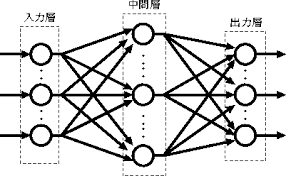

Denseクラスを用いて「層」の形を定義します.  
入力層だけはどんな形のデータが入ってくるかわからないのでinput_shapeを指定して上げる必要があります.  
各層で活性化関数を用いることで非線形のモデルを考えられるようにしています.

lossは目的関数であり,最小化したいものを指定します.ここでは交差エントロピーを用いています.  
式は$i$番目のクラスに属する確率を$p_i$,正解ラベル(そのクラスに属するなら1,それ以外は0)を$y_i$,クラス数をCとすると,  
$H_i = -(y_ilog(p_i) + (1 - y_i)log(1 - p_i))$  
${\rm loss} = {\sum_i^C} H_i$  
となる.

In [ ]:
def create_model():
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(784,)))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy',
                 optimizer='rmsprop',
                 metrics=['accuracy'])
    return model

In [ ]:
model = create_model()

`batch_size`はデータセットのデータを全部一気に扱うと,計算が大変かつ異常値の影響を受けやすくなるので,小さく分けて学習させます.1回の学習に何個のデータを用いるかをbatch_sizeで指定します.  
`epochs`は何回学習を繰り返すかを指定します.  

In [ ]:
history = model.fit(trn_x, trn_y,
                   batch_size=128,
                   epochs=20,
                   verbose=1,
                   validation_data=(val_x, val_y))

score = model.evaluate(test_x, test_y, verbose=0)

In [ ]:
score[1]

98%の正解率のモデル完成!